In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = 'C:/Users/baoth/Desktop/Learnmore/DS/machine_learning_PS/data/HR_comma_sep.csv'

In [3]:
df=pd.read_csv(data_dir)
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
df[df.isnull().any(axis=1)].count()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
def plot_one_fearture_vs_labels(fearture,label):
    plt.scatter(fearture,label)
    plt.xlabel(str(fearture.name))
    plt.ylabel(str(label.name))

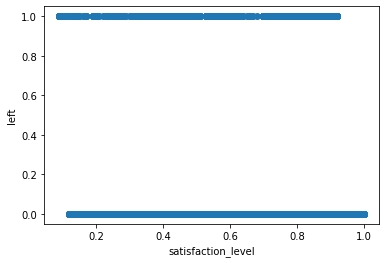

In [8]:
plot_one_fearture_vs_labels(df['satisfaction_level'],df['left'])

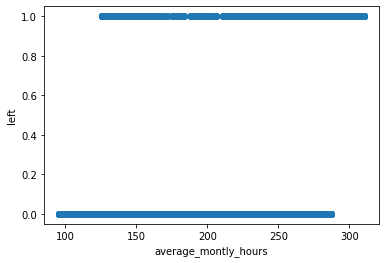

In [9]:
plot_one_fearture_vs_labels(df['average_montly_hours'],df['left'])

In [10]:
pd.crosstab(df['Department'],df['left'])

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [11]:
pd.crosstab(df['salary'],df['left'])

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


In [12]:
df_corr = df.corr()
df_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

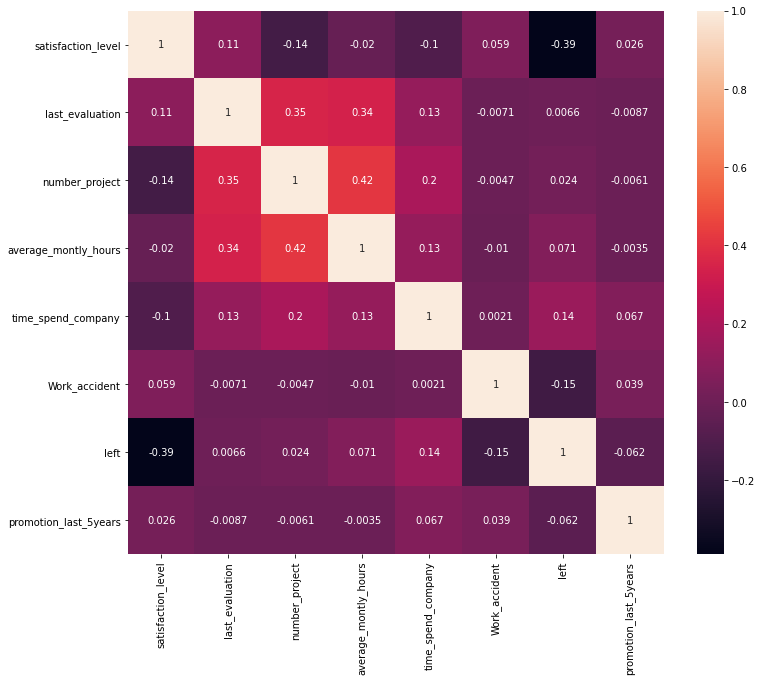

In [13]:
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_corr,annot=True)

In [14]:
df = df.drop('Department',axis=1)
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium
2,0.11,0.88,7,272,4,0,1,0,medium
3,0.72,0.87,5,223,5,0,1,0,low
4,0.37,0.52,2,159,3,0,1,0,low
5,0.41,0.50,2,153,3,0,1,0,low
6,0.10,0.77,6,247,4,0,1,0,low
7,0.92,0.85,5,259,5,0,1,0,low
8,0.89,1.00,5,224,5,0,1,0,low
9,0.42,0.53,2,142,3,0,1,0,low


In [15]:
df = pd.get_dummies(df,columns=['salary'])
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0
5,0.41,0.50,2,153,3,0,1,0,0,1,0
6,0.10,0.77,6,247,4,0,1,0,0,1,0
7,0.92,0.85,5,259,5,0,1,0,0,1,0
8,0.89,1.00,5,224,5,0,1,0,0,1,0
9,0.42,0.53,2,142,3,0,1,0,0,1,0


In [16]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.96,0.64,3,166,2,0,0,0,0,0,1
1,0.99,0.76,4,185,5,0,0,0,0,1,0
2,0.40,0.46,2,155,3,0,1,0,0,0,1
3,0.49,0.87,3,212,2,0,0,0,0,0,1
4,0.43,0.88,2,149,4,0,0,0,0,0,1
5,0.38,0.52,2,128,3,0,1,0,0,0,1
6,0.78,0.89,4,137,3,0,0,0,0,0,1
7,0.37,0.50,2,131,3,0,1,0,0,0,1
8,0.61,0.74,5,185,2,1,0,0,0,0,1
9,0.37,0.48,2,159,3,0,1,0,0,1,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary_high            14999 non-null  uint8  
 9   salary_low             14999 non-null  uint8  
 10  salary_medium          14999 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 981.5 KB


# Classification 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = df.drop('left',axis=1)
target = df['left']
def get_X_y(features,target):
    sc = StandardScaler()
    features = sc.fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2)
    return X_train, X_test, y_train, y_test

In [63]:
X_train, X_test, y_train, y_test = get_X_y(features,target)

In [64]:
X_train.shape,y_train.shape

((11999, 6), (11999,))

In [65]:
X_test.shape,y_test.shape

((3000, 6), (3000,))

In [66]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [67]:
y_pred = logistic_model.predict(X_test)

In [68]:
pred_results = pd.DataFrame({'y_test' : y_test,'y_pred':y_pred})
pred_results.head(10)

,y_test,y_pred
6994,0,0
1420,0,0
2734,0,0
10059,0,0
7658,1,1
816,0,0
4314,0,0
11016,0,0
3718,0,0
1312,0,0


In [69]:
pd.crosstab(pred_results['y_test'],pred_results['y_pred'])

y_pred,0,1
y_test,,
0,2131,123
1,553,193


In [70]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
def summarize_classification(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred,normalize=True)
    #num_acc = accuracy_score(y_test,y_pred,normalize=False)

    prec = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    #print('test data count',len(y_test))
    print('acc: ', acc)
    print('precision', prec)
    print('recall',recall)
    #print('acc_count',num_acc)

In [71]:
summarize_classification(y_test,y_pred)

acc:  0.7746666666666666
precision 0.6107594936708861
recall 0.2587131367292225


In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
naive_bayes_model = GaussianNB().fit(X_train,y_train)
y_pred = naive_bayes_model.predict(X_test)
summarize_classification(y_test,y_pred)

acc:  0.729
precision 0.47339593114241
recall 0.8120805369127517


# Use another features

In [30]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [31]:
features = df[['satisfaction_level','last_evaluation','average_montly_hours','salary_high','salary_low','salary_medium']]
target = df['left']

In [38]:
X_train, X_test, y_train, y_test = get_X_y(features,target)

In [39]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((11999, 6), (11999,), (3000, 6), (3000,))

In [34]:
logistic_model.fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)
summarize_classification(y_test,y_pred)

acc:  0.774
precision 0.5196629213483146
recall 0.26734104046242774


In [41]:
naive_bayes_model.fit(X_train,y_train)
y_preds = naive_bayes_model.predict(X_test)
summarize_classification(y_test,y_preds)

acc:  0.785
precision 0.5722801788375559
recall 0.5175202156334232
